# Taller 1: Multi Armed Bandits (MAB)

Este *Notebook* contiene un simple ejemplo de como interactuar con los escenarios propuestos para realizar el **Taller 1: Multi Armed Bandits** del curso de *Reinforcement Learning* (IELE-4922) de la Universidad de los Andes. 

## BanditEnvs

### Importar clase

La clase se importa desde el archivo envs.pyc (adjunto a la guía de este taller). Para esto puede subir el archivo manualmente a su GoogleDrive o clonarlo desde el repositorio de github.



In [1]:
# Se habilita el acceso al sistema de archivos de drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [2]:
# Se cambia de directorio al cual desea trabajar (EDITE EL DIRECTORIO)
%cd drive/MyDrive/ReinforcementLearning/Taller1_MAB/

/content/drive/MyDrive/ReinforcementLearning/Taller1_MAB


En caso de NO haber subido el archivo envs.pyc a su Drive, también puede descargarlo desde github, ejecutando la siguiente celda. Solo debe clonar el reopositorio una vez.

In [ ]:
# Clonar repo de github (NO EJECUTAR LA CELDA SI YA SUBIÓ EL ARCHIVO)
! git clone https://github.com/Cesard97/ReinforcementLearning2021-1.git

Cloning into 'ReinforcementLearning2021-1'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [ ]:
# Agregar path de la carpeta del repo (en caso de haber clonado el repo)
import sys
sys.path.append('ReinforcementLearning2021-1')

In [3]:
# Se importa la clase BanditEnvs del archivo envs.pyc
from envs import BanditEnvs

# Se importan otras librerias utiles
import random
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import clear_output

### ¿Cómo interactuar con la clase?

La clase $\texttt{BanditEnvs}$ contiene los 3 escenarios del problema de *Multi Armed Bandits* que se van a estudiar:

*   Escenario no estático. 
*   Escenario con alta varianza.
*   Escenario con baja varianza.

\* No necesariamente los escenarios se encuentran ordenados de esta forma.

A continuación se presenta un pequeño ejemplo de como ejecutar uno de los escenarios (envs):

In [4]:
# Se crea un objeto de la clase BanditEnvs con k = 10
bandit_envs = BanditEnvs(k=10)

# Se ejecuta la accion 2 sobre el entorno 2
a = 2
reward = bandit_envs.run_env_2(action=a)
print('La recompensa de la acción ' + str(a) +' en el env_2 es:')
print(reward)

# Se reinician los entornos
bandit_envs.reset()

La recompensa de la acción 2 en el env_2 es:
0.5963075374630289


Para ejecutar las acciones en los otros dos escenarios solo debe cambiar el número al final de la función. *Ejemplo:* para ejecutar el escenario 1 solo debe usar la función $\texttt{.run_env_1(a)}$

Note que los escenarios se pueden reiniciar con la función $\texttt{.reset()}$, esto es útil luego de ejecutar un número considerable de iteraciones, especialmente en el caso del escenario no estático. Ahora bien, usted NO debe reiniciar los escenarios cada vez que ejecuta una única acción.

Finalmente, tenga en cuenta que el valor de $k$ es un parámetro de la clase $\texttt{BanditEnvs}$, por lo que puede variar su valor si así lo desea. En este caso, la clase soporta valores de $k$ hasta de 20.

## Acciones aleatorias

A continuación se presenta una implementación de acciones aleatorias sobre el segundo escenario. Usted debe realizar una implementación similar con las tres metodologías propuestas en la guía y estudiadas en clase.

In [5]:
# Ejemplo de selección aleatoria de entornos
n = 1000
rand_reward = []
rand_action_selected = []

# Se reinician los entornos
bandit_envs.reset()

# Se ejecutan n pasos
for i in range(0,n):
  # Accion aleatoria
  a = random.randint(0,9)
  # Se ejecuta la accion a
  r = bandit_envs.run_env_1(a)
  rand_reward.append(r)
  rand_action_selected.append(a)

Finalmente, se grafica la recompensa obtenida para esta implementación aleatoria. **Recuerde que como mínimo debe graficar la evolución de la recompensa promedio (sobre un horizonte de tiempo) para los tres escenarios con las tres implementaciones.**
No obstante, usted puede graficar las metricas o variables que considere necesarias para responder a la pregunta del taller. Algunas de estas pueden ser: la recompensa esperada, el *regret*, % de acciones óptimas tomadas, entre otras.

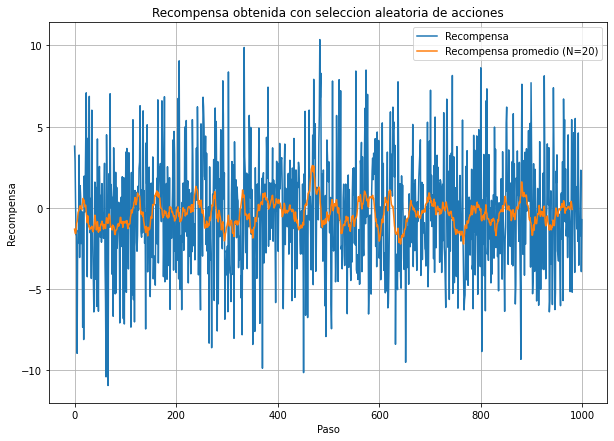

In [7]:
# N window mean
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

# Plot reward
fig=plt.figure(figsize=(10, 7))
plt.plot(rand_reward)
plt.plot(running_mean(rand_reward, 20))
plt.xlabel('Paso')
plt.ylabel('Recompensa')
plt.title('Recompensa obtenida con seleccion aleatoria de acciones')
plt.legend(['Recompensa','Recompensa promedio (N=20)'])
plt.grid(True)
plt.show()